In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample

In [6]:
multi_layer_dup_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
multi_layer_dup_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
multi_layer_train = multi_layer_dup_train.drop_duplicates(subset=['User', 'Timestamp'])
multi_layer_unique_test = multi_layer_dup_test.drop_duplicates(subset=['User', 'Timestamp'])
multi_layer_test = multi_layer_unique_test.iloc[sample(range(len(multi_layer_unique_test)), 40), :]

print ('(#row,#column) of train dataset' , multi_layer_train.shape)
print ('(#row,#column) of test dataset' , multi_layer_test.shape)

('(#row,#column) of train dataset', (406, 46))
('(#row,#column) of test dataset', (40, 46))


In [7]:
X_train = multi_layer_train.values[:, 2:45]
y_train = multi_layer_train.values[:, 45]
X_test = multi_layer_test.values[:, 2:45]
y_test = multi_layer_test.values[:, 45]

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [132]:
mlp = MLPClassifier(hidden_layer_sizes=(15,),max_iter=60)
mlp_pred=mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\nAccuracy of Multi-layer Perceptron Score: %.2f' % mlp.score(X_test,y_test))
print('\nAccuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))

['running' 'running' 'running' 'running' 'running' 'running' 'walking'
 'walking' 'walking' 'running' 'running' 'walking' 'walking' 'running'
 'walking' 'walking' 'walking' 'walking' 'walking' 'walking' 'walking'
 'walking' 'running' 'running' 'walking' 'walking' 'running' 'walking'
 'running' 'running' 'walking' 'walking' 'walking' 'running' 'running'
 'running' 'running' 'walking' 'walking' 'walking']
[[13  7]
 [ 5 15]]
             precision    recall  f1-score   support

    running       0.72      0.65      0.68        20
    walking       0.68      0.75      0.71        20

avg / total       0.70      0.70      0.70        40


Accuracy of Multi-layer Perceptron Score: 0.70

Accuracy of Accuracy Score : 0.70


In [123]:
for i in range(0,len(mlp.coefs_[0])):
    print mlp.coefs_[0][i]

[-0.14832588 -0.0016869   0.19640928 -0.09960565  0.17380905 -0.16242179
  0.13349543 -0.02374858  0.16727954 -0.07438662 -0.16040824  0.11369525
  0.18569266 -0.10706482  0.05736786]
[ 0.19308784  0.34991407 -0.01503363 -0.08581065  0.00811677  0.25941156
  0.24988267  0.00531556  0.0879106   0.05692786  0.3219229  -0.04735964
  0.35550873 -0.0079372   0.27870583]
[ 0.04463051 -0.21271666 -0.12848605  0.20441581  0.36220749 -0.11841668
 -0.04271731 -0.15981034 -0.19554312  0.18589542 -0.00870839 -0.05293841
  0.11212792  0.14585617 -0.31795423]
[-0.0419372  -0.10697277  0.21755814 -0.10296885 -0.12960097  0.07206938
 -0.31385372 -0.12143723  0.17091818 -0.05361283  0.19943426  0.10566402
  0.21958269  0.11879424  0.08046023]
[-0.19679028 -0.17616575 -0.04169148  0.27767236  0.02262695 -0.03973958
  0.1805154  -0.19325687  0.10979998  0.19590441 -0.14863489  0.0164746
  0.05916254 -0.09881695 -0.19507316]
[ 0.17538038 -0.3090144   0.20313079  0.40151156  0.07191118 -0.24502224
  0.0654

In [124]:
avg_weight = []
for i in range(0,len(mlp.coefs_[0])):
    avg_weight.append(np.mean(mlp.coefs_[0][i]))
print ('Important features (featureName, weigh of important, #column)')
header = list(multi_layer_train.head(1))
important_feature = []
for i in range(0,len(avg_weight)):
     important_feature.append((header[i+2],avg_weight[i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('Bin2,x', 0.13403755122428809, 3)
('Bin7,y', 0.12100037016790845, 18)
('Bin5,y', 0.11033708440750736, 16)
('Bin7,x', 0.10716550790342998, 8)
('TimeDiffPeaks-z', 0.097141816547573451, 34)
('TimeDiffPeaks-y', 0.09467666960425368, 33)
('AvgAcc-z', 0.076782762297476548, 40)
('Bin8,y', 0.061947211002028359, 19)
('Bin3,z', 0.033143447417199198, 24)
('Bin8,x', 0.029181653954342104, 9)
('StdDev-z', 0.02755359358421124, 43)
('Bin8,z', 0.024917417564454047, 29)
('Bin4,x', 0.020939838728566845, 5)
('Bin4,z', 0.018348813127264971, 25)
('Bin1,x', 0.01667337314830869, 2)
('Bin1,z', 0.015792597534347412, 22)
('Bin9,x', 0.014650772696619907, 10)
('Bin10,x', 0.010523429867257674, 11)
('Bin1,y', 0.0074127712160413596, 12)
('Bin6,x', 0.0017170414397350074, 7)
('Bin6,y', -0.00067019253068868008, 17)
('Bin2,y', -0.0035956829504882621, 13)
('Bin6,z', -0.0041762882708015255, 27)
('AvgAbsDiff-y', -0.0075628346317582829, 36)
('Bin5,z', -0.009990034

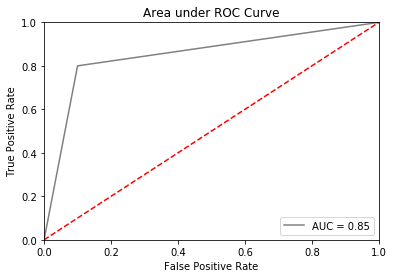

In [125]:
from sklearn import metrics
def plot_roc_curve(Y_predict,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict)):
        if Y_predict[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'grey', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#     plt.savefig('./image/Area_under_roc_pc.png', dpi=1000)
    
plot_roc_curve(y_pred,y_test,"Area_under_roc_pc")

Confusion matrix, without normalization
[[13  7]
 [ 5 15]]
Normalized confusion matrix
[[ 0.65  0.35]
 [ 0.25  0.75]]


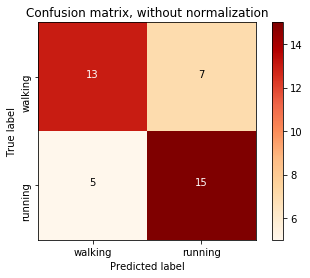

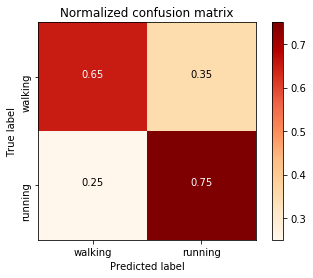

In [138]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.OrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')
# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr', dpi=1000)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()